In [18]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

In [100]:
def tracking(image_path, info_path):
    image_names=sorted(os.listdir(image_path))
    img=cv2.imread(image_path + image_names[1])
    dim = (500, 500)
    img = cv2.resize(img, dim)
    curr_cells=np.load(info_path+image_names[1].split('.')[0]+'.npy', allow_pickle=True)
    cell=curr_cells[0]
    label, cropped, y1, y2, x1, x2 = cell[0], cell[1], cell[2], cell[3], cell[4], cell[5]
    roi = img[y1:y2,x1:x2]
    roiHist = cv2.calcHist([roi], [0], None, [16], [0, 180])
    roiHist = cv2.normalize(roiHist, roiHist, 0, 255, cv2.NORM_MINMAX)
    track_window = (x1,y1,x2,y2)
    term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
    print(roiHist)
    i=1
    for path in image_names[2:]:
        if path.endswith(".npy"):
            continue
            
        img=cv2.imread(image_path + path)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roiHist,[0,180],1)
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        print(ret)
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(img,[pts],True, 255,2)
        cv2.imshow('img2',img2)
        cv2.imwrite(chr(i)+".jpg",img2)
        plt.imshow(img2)
        i+=1

[[  0.  ]
 [  0.  ]
 [  0.  ]
 [  0.  ]
 [  0.  ]
 [  0.  ]
 [  0.  ]
 [  0.  ]
 [191.25]
 [191.25]
 [255.  ]
 [127.5 ]
 [255.  ]
 [191.25]
 [191.25]
 [127.5 ]]
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)

((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0), (0.0, 0.0), 0.0)
((0.0, 0.0

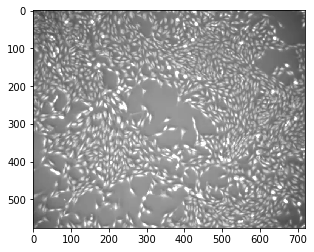

In [101]:
tracking('./phc/Sequence 1/', './phc/Sequence 1/')

't000.tif'